# Medical Images - Dicom 3D

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom

### Open a Dicom file

In [2]:
DCM = pydicom.dcmread(r'../Assets/CT/IM-0001-0200-0001.dcm')

FileNotFoundError: [Errno 2] No such file or directory: '../Assets/CT/IM-0001-0200-0001.dcm'

In [3]:
type(DCM)

NameError: name 'DCM' is not defined

In [4]:
DCM

NameError: name 'DCM' is not defined

To access each of the attributes of the DICOM file the name of the attribute is used

In [5]:
DCM.PatientName

NameError: name 'DCM' is not defined

In [6]:
DCM.StudyDescription

NameError: name 'DCM' is not defined

In [7]:
DCM.ProtocolName

NameError: name 'DCM' is not defined

But I also have the information from the TAG, using the group and element on hexadecimal:

In [8]:
print("Tag  :",DCM[0x0018,0x1030].tag)
print("VR   :",DCM[0x0018,0x1030].VR)
print("valor:",DCM[0x0018,0x1030].value)

NameError: name 'DCM' is not defined

#### typical visualization windows in CT

- Head and neck
    - Brain W: 80 C: 40
    -W: 130-300 c: 50-100
    - ACV W: 8 C: 32 / W: 40 C: 40
    - Bone W: 2800 C: 600
    - soft fabric: W: 350–400 C: 20–60
    
- Chest
    - Lungs W: 1500 C: -600
    - Mediastino W: 350 C: 50
    
- Abdomen
    - soft fabric W: 400 c: 50
    - Liver W: 150 C: 30

- Column
    - Soft fabric W: 250 C: 50
    - Bone W: 1800 C: 400


## Multipanar reconstruction

Tomographies are a set of images (cuts, slices) that are acquired in the same diagnostic act. That is why they allow reconstructions, that is, to obtain an image in any plane that intersects the overturned volume. 

It is usually established to use the tranversal, coronal and sagittal cuts to analyze the image.


### 1 Load all the cuts of tomography

In order to make a reconstruction, it is necessary to have all the tomographic cuts. For them we are going to use the `Glob` module, which allows access to the complete information of a directory on our computer.

In [9]:
import glob

directorio = '../Assets/CT/*.dcm'

archivos = glob.glob(directorio, recursive=False)

print(type(archivos))
print(archivos[0:10])
print(len(archivos))


<class 'list'>
[]
0


You can see that `Glob.glob` return in` files' a list of files in the directory. However, the file list is messy. To do this, we have to make a parenthesis and analyze how to order the list.

#### *Intermezzo *: Sort and mutability 

Python, of course, gives us the `SORTED` function that can order a list. But it also gives us the `Sort` method that rearranges a list. What is the difference? Let's see:


In [10]:
a = [3,4,1,5]
b = sorted(a,reverse = True)
print(b)

[5, 4, 3, 1]


In [11]:
c = ['monoambiente', 'casa', 'departamento']
print(c)
b = c.sort()
print(b)
print(c)

['monoambiente', 'casa', 'departamento']
None
['casa', 'departamento', 'monoambiente']


In [12]:
def largo(palabra):
    """
        función de ordenamiento, recibe un sólo argumento
        y retorna un solo valor, correspondiente al criterio 
        de ordenamiento de la lista
    """
    return len(palabra)


print(largo('hola'))

c = ['monoambiente', 'casa', 'departamento','posada']
print(c)
b = sorted(c)
print("c alphabetically:",b)
d = sorted(c,key=largo)
print("C Ordered by long word:",d)
f = sorted(c,key=largo,reverse=True)
print("C Ordered by long word, inverse:",f)



4
['monoambiente', 'casa', 'departamento', 'posada']
c alphabetically: ['casa', 'departamento', 'monoambiente', 'posada']
C Ordered by long word: ['casa', 'posada', 'monoambiente', 'departamento']
C Ordered by long word, inverse: ['monoambiente', 'departamento', 'posada', 'casa']


> While `SORTED` Returns an orderly list,` Sort` reorder the list itself

In this sense, we say that `Sort` is a function that *mutates *a variable in the same place (in English, *in place *). On the other hand, `SORTED` does not change the function input variable, and returns a new variable.

#### *End Intermezzo *

Returning to our example with files

In [13]:
archivos_ordenados = sorted(archivos)
print(archivos_ordenados[0:10])

[]


In [14]:
dicoms = []
for fname in archivos_ordenados:
    dicoms.append(pydicom.read_file(fname))

print("Number of tomographic cuts:",len(dicoms))

Number of tomographic cuts: 0


Now our list `dicom` contains the dicom data of ** all ** the tomographic cuts. Let's see if so:

In [15]:
n_cts = len(dicoms)

for (i,dcm) in zip(range(0,n_cts),dicoms):
    print("Patient",i, ":", dcm.PatientName)

It is clear that all cuts must have the same patient name. There are other DICOM data that change according to the tomographic cut, for example:

In [16]:
for (i,dcm) in zip(range(0,n_cts),dicoms):
    print("Cut position",i, ":", dcm.SliceLocation, " mm")

#### 2 Construction of the volume volume

Convinced that we effectively have the DICOM information on our list, we must now recover the image of each court, and build a volume with them. For that we are going to use a 3D arrangement of `numpy`.


In [17]:
slice0 = dicoms[0]   # First cut, I use it to recover common data to all cuts
vol_shape = list(slice0.pixel_array.shape) # 2D image size
print(vol_shape)
vol_shape.append(len(dicoms))   # We add the image size to the list along z
# If we have little RAM, we can set the number of cuts on the Z axis
# vol_shape.append (100) # We add to the list the size of the image along z

print(vol_shape)

matriz3D = np.zeros(vol_shape)
print(matriz3D.shape)

IndexError: list index out of range

We already have our tomographic volume ready to be filled with the images:

In [18]:
# If we have little RAM, we can read only the cuts we want, chord
# to the amount of cuts we define before
# for i, slice in enumerate(dicoms[100:200]):

for i, slice in enumerate(dicoms):

    corte = slice.pixel_array * slice.RescaleSlope + slice.RescaleIntercept
    matriz3D[:, :, i] = corte

#### 3 Image extraction

NameError: name 'matriz3D' is not defined

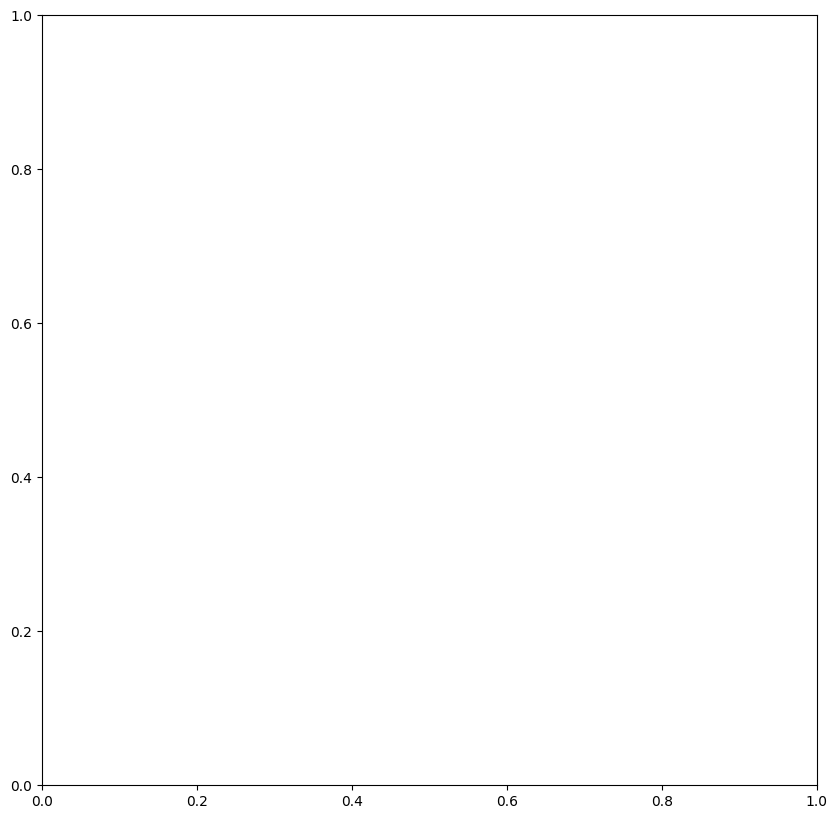

In [19]:
# 
# Window and level
# 
c = 40
w = 400
ventmax = c + w/2
ventmin = c - w/2


fig_1 = plt.figure(1, figsize=(10,10))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[255, :, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
plt.show()


#### 4 aspect relationship

As can be seen, the image appears 'crushed' in the longitudinal direction. This is because ** Voxels are not isotropic ** in CT, that is, they do not have the same dimensions:

In [20]:
espaciadoX,espaciadoY = slice0.PixelSpacing
espesor = slice0.SliceThickness
print('El espesor de corte es de: {:.2f} mm'.format(espesor))
print('La dimension en el plano X,Y es de {:.2f} mm x {:.2f} mm '.format(espaciadoX,espaciadoY))

NameError: name 'slice0' is not defined

With these data we can define the appearance ratio between the Z axis and the X axis (O Y):

$$
\ Texttt {Aspectrio} = \ fraud
$$

In [21]:
aspecto = espesor/espaciadoX
print("ASPECT RELATIONSHIP:",aspecto)
fig_1 = plt.figure(1, figsize=(15,15))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[280, :, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
a1.set_aspect(aspecto)
a1.set_title('MPR CORONAL')
plt.show()

NameError: name 'espesor' is not defined

### one more thing ...

> ** Not always the order of the names of the Dicom files of a CT corresponds to the order along the z axis !!! **

Indeed, it could well be that when ordering the files by name, as we did above, the tomographic cuts are disorderly. 

Luckily, as we saw before, `SORTED` comes to the rescue.

In [22]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.

    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



The `SORTED` can optionally receive a function used to order the list, in the` Key` parameter.

In our case, the function we need is one that returns the value of `slicelocation`, which effectively indicates the position of the cut along the Z axis.

In [23]:
def z_mm(archivo):
    dcm = pydicom.read_file(archivo)
    return dcm.SliceLocation

z_mm('../Assets/CT/IM-0001-0145-0001.dcm')

AttributeError: module 'pydicom' has no attribute 'read_file'

In [24]:
print(archivos[0:10])

[]


In [25]:
archivos_reordenados = sorted(archivos,key = z_mm, reverse = True)
print(archivos_reordenados[0:10])

[]


In [26]:
dicoms = []
for fname in archivos_reordenados:
    dicoms.append(pydicom.read_file(fname))

print("Number of tomographic cuts:",len(dicoms))

Number of tomographic cuts: 0


In [27]:
for i, slice in enumerate(dicoms):
    corte = slice.pixel_array * slice.RescaleSlope + slice.RescaleIntercept
    matriz3D[:, :, i] = corte

In [28]:
aspecto = espesor/espaciadoX
print("ASPECT RELATIONSHIP:",aspecto)
fig_1 = plt.figure(1, figsize=(15,15))
a1 = fig_1.add_subplot(111)
a1.imshow(matriz3D[280, :, :].T, cmap='gray', vmin=ventmin, vmax=ventmax)
a1.set_aspect(aspecto)
a1.set_title('MPR CORONAL')
plt.show()

NameError: name 'espesor' is not defined